## FIRST SEMINAR NOTEBOOK

Requirements

In [ ]:
#%pip install ffmpeg-python
#%pip install PIL
#%pip install numpy
#%pip install Pillow
#%pip install io
#%pip install scipy
#%pip install pyWavelets

In [33]:
import PIL
from PIL import Image as Img
from IPython.display import Image
import ffmpeg
from ffmpeg import filter
import io
from io import BytesIO
import numpy as np
import scipy.fftpack
from scipy.fftpack import dct, idct
import pywt

**EXERCISE 2:** RGB to YUV and YUV to RGB functions

In [5]:
def rgb2yuv(color):
    r = color[0]
    g = color[1]
    b = color[2]

    Y = 0.257*r +0.504*g +0.098*b +16
    U = -0.148*r -0.291*g +0.439*b +128
    V = 0.439*r -0.368*g -0.071*b +128

    color_yuv = [Y, U, V]
    return color_yuv

def yuv2rgb(color):
    Y = color[0]
    U = color[1]
    V = color[2]

    r = 1.164*(Y-16)+1.596*(V-128)
    g = 1.164*(Y-16) - 0.813*(V-128)-0.391*(U-128)
    b = 1.164*(Y-16)+2.018*(U-128)

    color_rgb = [r, g, b]
    return color_rgb

In [6]:
color = [255, 255, 255]
color_yuv = rgb2yuv(color)
color_rgb = yuv2rgb(color_yuv)
print("Original color in RGB:", color)
print("Original color in YUV:", color_yuv)
print("Reconstructed color in RGB:", color_rgb)

Original color in RGB: [255, 255, 255]
Original color in YUV: [235.04500000000002, 128.0, 128.0]
Reconstructed color in RGB: [254.96838, 254.96838, 254.96838]


**EXERCISE 3:** Use ffmpeg to resize images into lower quality.

In [37]:
example_image = "images/ref.jpg"
#example_image = "images/AP11.jpg"
#example_image = "images/VH_madrid.jpg"
# ... any of the images that are on the images folder

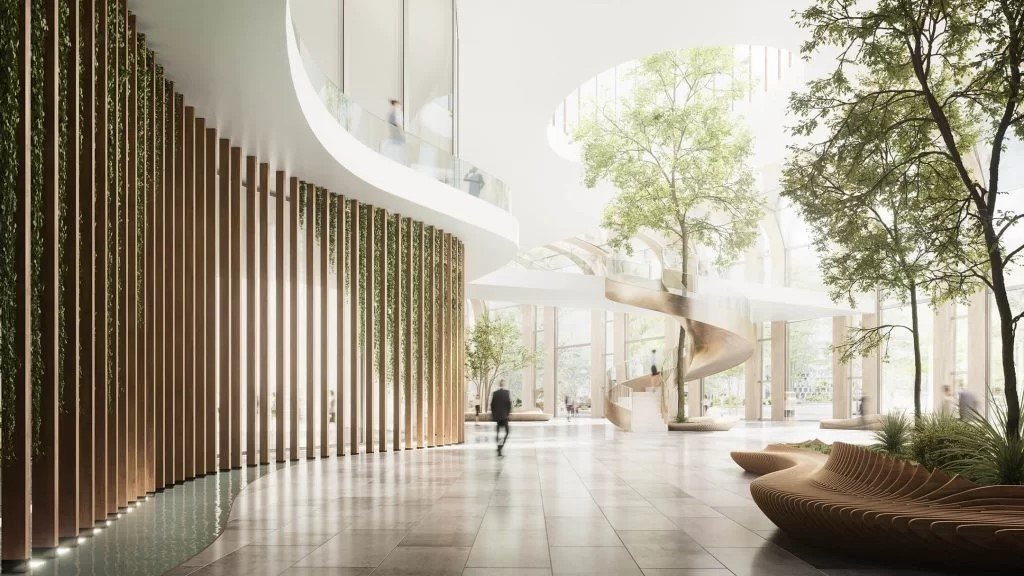

In [38]:
Img.open(example_image)

In [16]:
image = Img.open(example_image)

width, height = image.size

print(f"The image resolution is: {width}x{height}")

The image resolution is: 1024x576


In [ ]:

# Input and output file paths
input_file = example_image
output_file = 'resized_image.jpg'
# Resize the image
try:
    ffmpeg.input(input_file).output(output_file, vf='scale=576:256').run(capture_stdout=True, capture_stderr=True, overwrite_output=True)
    print(f"Successfully resized {input_file} to 576x256")
except ffmpeg.Error as e:
    print(f"An error occurred: {e}")

Successfully resized images/ref.jpg to 576x256


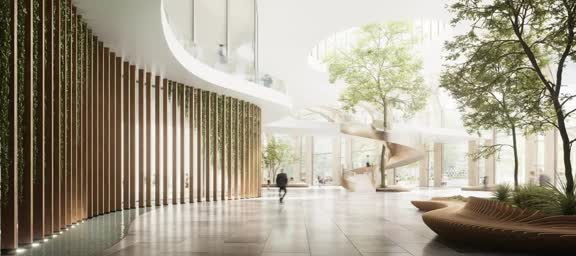

In [18]:
Image('resized_image.jpg')

In [21]:
## After having done every step separately, we add everything onto this function
def resize_image(input_file, output_file, width, height):

  image = Img.open(input_file)

  width_input, height_input = image.size
  print(f"The image resolution is: {width_input}x{height_input}")

  try:
    ffmpeg.input(input_file).output(output_file, vf=f"scale={width}:{height}").run(capture_stdout=True, capture_stderr=True, overwrite_output=True)
    Image(output_file)
    print(f"Successfully resized {input_file} to {width}x{height}")
  except ffmpeg.Error as e:
    print(f"An error occurred: {e}")

  return Image(output_file)

The image resolution is: 1024x576
Successfully resized images/ref.jpg to 320x240


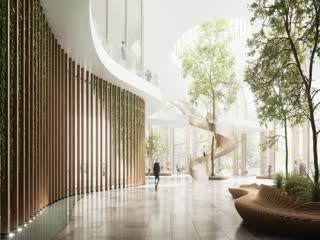

In [22]:
#Only one image can be shown per cell, so we chose to return the output image
resize_image(example_image, 'resized_image2.jpg', 320, 240)

**Exercise 4:** Serpentine method function

This is the serpentine pattern

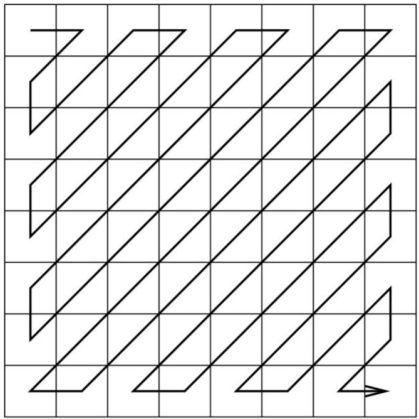

In [23]:
## First we have to define the 8x8 block of serpentine pattern that JPEG compression works with:
serpentine_order = [(0,0), (1,0), (0,1), (0,2), (1,1), (2,0), (3,0), (2,1), (1,2), (0,3), (0,4), (1,3), (2,2), (3,1), (4,0), (5,0), (4,1), (3,2), (2,3), (1,4), (0,5),
                    (0,6), (1,5), (2,4), (3,3), (4,2), (5,1), (6,0), (7,0), (6,1), (5,2), (4,3), (3,4), (2,5), (1,6), (0,7), (1,7), (2,6), (3,5), (4,4), (5,3), (6,2),
                    (7,1), (7,2), (6,3), (5,4), (4,5), (3,6), (2,7), (3,7), (4,6), (5,5), (6,4), (7,3), (7,4), (6,5), (5,6), (4,7), (5,7), (6,6), (7,5), (7,6), (6,7),
                    (7,7)]

len(serpentine_order) ## to make sure we wrote all pixels (8x8=64)

64

In [24]:
def serpentine(input_file):

  image = Img.open(input_file).convert("RGB") ## convert part to get pixels in rgb value
  width, height = image.size

  pixels_im = image.load()

  pixels_read = []

  for w in range (0, width, 8):                ## start, stop, step
    for h in range (0, height, 8):

      for (x,y) in serpentine_order:           ## for each pixel (each pair of x,y coordinates)
        pixel_x = w + x                        ## the coordinate of the serpentine plus the block that it is in
        pixel_y = h + y
        pixels_read.append(pixels_im[pixel_x, pixel_y])

  return pixels_read

In [25]:
ref_values = serpentine(example_image)

## To make sure that the # of pixels read is the same as the image
print("Number of pixels in image:", width*height)
print("Number of pixels read with serpentime pattern:", len(ref_values))

## Showing the first 10 pixels (if we print the whole sequence the cell crashes)
print(" \n10 first pixel values (in RGB) of the reference image:")
print(ref_values[0:10])

Number of pixels in image: 589824
Number of pixels read with serpentime pattern: 589824
 
10 first pixel values (in RGB) of the reference image:
[(49, 51, 30), (50, 52, 31), (37, 39, 18), (32, 34, 13), (38, 40, 19), (30, 32, 10), (35, 37, 15), (25, 27, 5), (34, 36, 15), (31, 33, 12)]


In [26]:
## Saving list of pixels into an image
  #create array with list, and reshape into width and height of image
array_serpentine = np.array(ref_values, dtype=np.uint8)
array_serpentine = array_serpentine.reshape(height, width, 3)

# create image with array
serpentine_image = Img.fromarray(array_serpentine)

# save image
serpentine_image.save("serpentine_image.jpg")

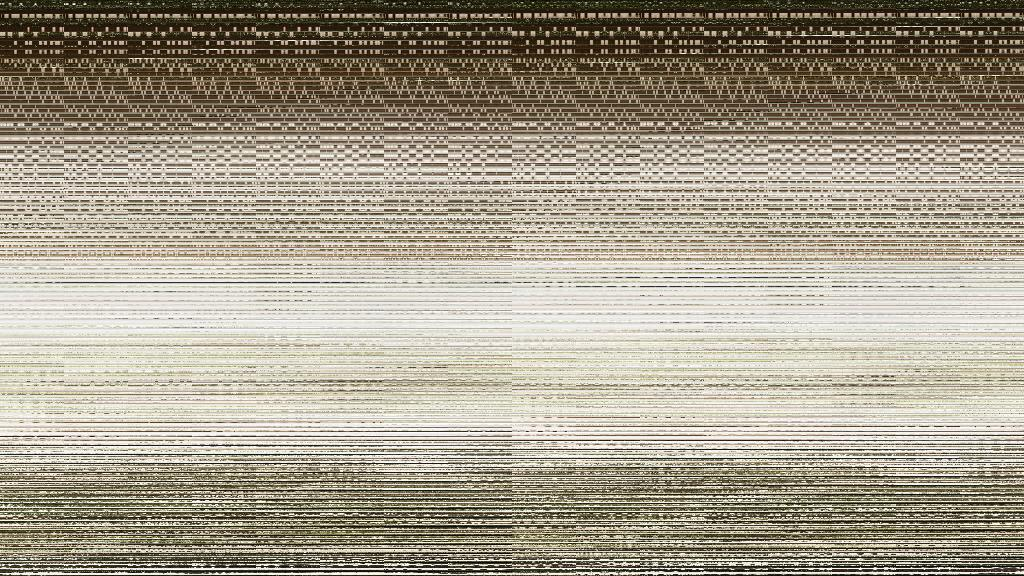

In [27]:
Image("serpentine_image.jpg")

**EXERCISE 5:** Use ffmpeg to transform image into B&W.

In [28]:
def grayscale_image(input_file, output_file):

  image = Img.open(input_file)

  try:
    ffmpeg.input(input_file).output(output_file, vf="format = gray").run(capture_stdout=True, capture_stderr=True, overwrite_output=True)
    Image(output_file)
    print(f"Successfully converted into Black & White!")
  except ffmpeg.Error as e:
    print(f"An error occurred: {e}")

  return Image(output_file)

Successfully converted into Black & White!


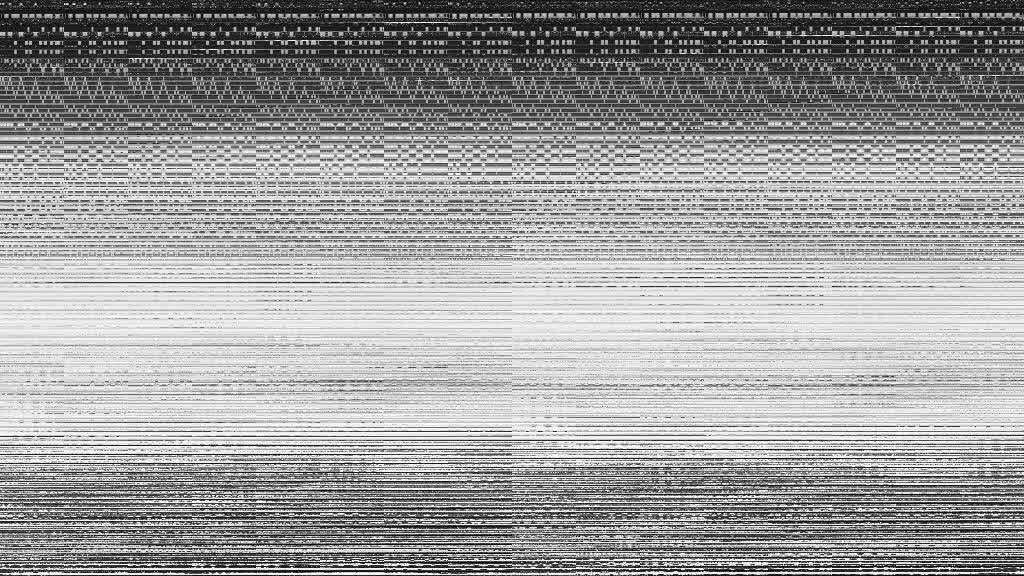

In [29]:
grayscale_image('serpentine_image.jpg', 'bw_image.jpg')

**EXERCISE 6:** Apply a run-lenght encoding from a series of bytes given.

In [30]:
def run_length_encoding(datastream):
  c = 0
  count = 0

  for x in range (len(datastream)):
    if datastream[c] == '0':
      count=count+1

      if datastream[c + 1] != '0':
        print("0"+ str(count), end='')
    else:
      print(datastream[c], end='')
    c = c+1

In [31]:
datastream = '45734712600000000623145'
run_length_encoding(datastream)

45734712608623145

**EXERCISE 7:** Use DCT to convert, decode (or both) an input.

In [41]:
def dct_conversion (input_file):
  serpentine_pixels = serpentine(input_file)

  serpentine_pixels = np.array(ref_values, dtype=np.uint8)
  serpentine_pixels = serpentine_pixels.reshape(height, width, 3);

  serpentine_image = Img.fromarray(serpentine_pixels)
  serpentine_image.save("serpentine_image2.jpg")

  grayscale_image("serpentine_image2.jpg", "serpentine_imagebw2.jpg")
  im = Img.open("serpentine_imagebw2.jpg")
  serpentinee = np.asarray(im)
  dct_values = dct(serpentinee, type=2, n=None, axis=-1)

  return dct_values



In [43]:
dct_values_ref = dct_conversion(example_image)
print("DCT values from image:")
print(dct_values_ref)

Successfully converted into Black & White!
DCT values from image:
[[[ 234.    0.    0.]
  [ 288.    0.    0.]
  [ 300.    0.    0.]
  ...
  [ 228.    0.    0.]
  [ 318.    0.    0.]
  [ 318.    0.    0.]]

 [[  90.    0.    0.]
  [ 294.    0.    0.]
  [  60.    0.    0.]
  ...
  [ 114.    0.    0.]
  [ 360.    0.    0.]
  [ 198.    0.    0.]]

 [[ 180.    0.    0.]
  [ 168.    0.    0.]
  [ 174.    0.    0.]
  ...
  [  84.    0.    0.]
  [ 156.    0.    0.]
  [ 324.    0.    0.]]

 ...

 [[1506.    0.    0.]
  [1434.    0.    0.]
  [1404.    0.    0.]
  ...
  [1530.    0.    0.]
  [1530.    0.    0.]
  [1530.    0.    0.]]

 [[ 360.    0.    0.]
  [ 372.    0.    0.]
  [ 642.    0.    0.]
  ...
  [ 498.    0.    0.]
  [ 282.    0.    0.]
  [ 654.    0.    0.]]

 [[ 354.    0.    0.]
  [ 318.    0.    0.]
  [ 270.    0.    0.]
  ...
  [ 162.    0.    0.]
  [  66.    0.    0.]
  [  36.    0.    0.]]]


In [44]:
def idct_conversion (dct_values):
  idct_values = idct(dct_values, type=2, norm='ortho', axis=-1, overwrite_x=False)

  return idct_values

In [45]:
idct_values_ref = idct_conversion(dct_values_ref)
print("IDCT values from image:")
print(idct_values_ref)

IDCT values from image:
[[[135.09996299 135.09996299 135.09996299]
  [166.27687753 166.27687753 166.27687753]
  [173.20508076 173.20508076 173.20508076]
  ...
  [131.63586138 131.63586138 131.63586138]
  [183.5973856  183.5973856  183.5973856 ]
  [183.5973856  183.5973856  183.5973856 ]]

 [[ 51.96152423  51.96152423  51.96152423]
  [169.74097914 169.74097914 169.74097914]
  [ 34.64101615  34.64101615  34.64101615]
  ...
  [ 65.81793069  65.81793069  65.81793069]
  [207.84609691 207.84609691 207.84609691]
  [114.3153533  114.3153533  114.3153533 ]]

 [[103.92304845 103.92304845 103.92304845]
  [ 96.99484522  96.99484522  96.99484522]
  [100.45894684 100.45894684 100.45894684]
  ...
  [ 48.49742261  48.49742261  48.49742261]
  [ 90.06664199  90.06664199  90.06664199]
  [187.06148722 187.06148722 187.06148722]]

 ...

 [[869.4895054  869.4895054  869.4895054 ]
  [827.92028602 827.92028602 827.92028602]
  [810.59977794 810.59977794 810.59977794]
  ...
  [883.34591186 883.34591186 883.3459

**EXERCISE 8:** Use DWT to convert, decode (or both) an input.

In [46]:
def dwt_conversion (input_file):
  serpentine_pixels = serpentine(input_file)

  serpentine_pixels = np.array(ref_values, dtype=np.uint8)
  serpentine_pixels = serpentine_pixels.reshape(height, width, 3);

  serpentine_image = Img.fromarray(serpentine_pixels)
  serpentine_image.save("serpentine_image2.jpg")

  grayscale_image("serpentine_image2.jpg", "serpentine_imagebw2.jpg")
  im = Img.open("serpentine_imagebw2.jpg")
  serpentinee = np.asarray(im)
  dwt_values = pywt.dwt2(serpentinee, 'haar')

  return dwt_values



In [48]:
dwt_values_ref = dwt_conversion(example_image)
print("DWT values from image:")
print(dwt_values_ref)

Successfully converted into Black & White!
DWT values from image:
(array([[[ 87.,  87.],
        [ 93.,  93.],
        [ 69.,  69.],
        ...,
        [ 84.,  84.],
        [129., 129.],
        [106., 106.]],

       [[ 64.,  64.],
        [ 22.,  22.],
        [ 61.,  61.],
        ...,
        [ 75.,  75.],
        [ 57.,  57.],
        [ 93.,  93.]],

       [[ 58.,  58.],
        [ 79.,  79.],
        [ 88.,  88.],
        ...,
        [ 65.,  65.],
        [ 74.,  74.],
        [ 80.,  80.]],

       ...,

       [[490., 490.],
        [489., 489.],
        [484., 484.],
        ...,
        [450., 450.],
        [470., 470.],
        [510., 510.]],

       [[122., 122.],
        [290., 290.],
        [339., 339.],
        ...,
        [126., 126.],
        [164., 164.],
        [156., 156.]],

       [[112., 112.],
        [ 97.,  97.],
        [ 93.,  93.],
        ...,
        [ 42.,  42.],
        [ 27.,  27.],
        [ 17.,  17.]]], shape=(576, 512, 2)), (array([[[ -9., 

In [49]:
def idwt_conversion (dwt_values):
  idwt_values = pywt.idwt2(dwt_values, 'haar')

  return idwt_values

In [50]:
idwt_values_ref = idwt_conversion(dwt_values_ref)
print("IDCT values from image:")
print(idwt_values_ref)

IDCT values from image:
[[[ 39.  39.  39.  39.]
  [ 48.  48.  48.  48.]
  [ 50.  50.  50.  50.]
  ...
  [ 38.  38.  38.  38.]
  [ 53.  53.  53.  53.]
  [ 53.  53.  53.  53.]]

 [[ 15.  15.  15.  15.]
  [ 49.  49.  49.  49.]
  [ 10.  10.  10.  10.]
  ...
  [ 19.  19.  19.  19.]
  [ 60.  60.  60.  60.]
  [ 33.  33.  33.  33.]]

 [[ 30.  30.  30.  30.]
  [ 28.  28.  28.  28.]
  [ 29.  29.  29.  29.]
  ...
  [ 14.  14.  14.  14.]
  [ 26.  26.  26.  26.]
  [ 54.  54.  54.  54.]]

 ...

 [[251. 251. 251. 251.]
  [239. 239. 239. 239.]
  [234. 234. 234. 234.]
  ...
  [255. 255. 255. 255.]
  [255. 255. 255. 255.]
  [255. 255. 255. 255.]]

 [[ 60.  60.  60.  60.]
  [ 62.  62.  62.  62.]
  [107. 107. 107. 107.]
  ...
  [ 83.  83.  83.  83.]
  [ 47.  47.  47.  47.]
  [109. 109. 109. 109.]]

 [[ 59.  59.  59.  59.]
  [ 53.  53.  53.  53.]
  [ 45.  45.  45.  45.]
  ...
  [ 27.  27.  27.  27.]
  [ 11.  11.  11.  11.]
  [  6.   6.   6.   6.]]]


**References**

Resize the image with ffmpeg: https://medium.com/@aleksej.gudkov/ffmpeg-python-example-a-guide-to-using-ffmpeg-with-python-020cdb7733e7

Format, load, fromarray, save fucntions of the image:
https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.Image.format


Information about the serpentine pattern: https://www.dspguide.com/ch27/6.htm


From list to array: https://stackoverflow.com/questions/46923244/how-to-create-image-from-a-list-of-pixel-values-in-python3


Reshaping the array: https://www.w3schools.com/python/numpy/numpy_array_reshape.asp


Black & white ffmpeg: https://stackoverflow.com/questions/32384057/ffmpeg-black-and-white-conversion

Run-length encoding: https://medium.com/@dafasaptian2304/python-for-data-compression-a-beginners-guide-to-rle-run-length-encoding-2cfe0b763f38